# Exploratory Data Analysis (EDA)

This notebook explores the Xente transactional dataset for Bati Bank’s credit-risk project. It follows the checklist described in *Task 2*. Importantly, data loading and plotting are handled via helper functions in `src.utils.eda_utils`. Restart & run‐all after cloning.

In [18]:
import pandas as pd
from pathlib import Path

import sys, os
from pathlib import Path

ROOT = Path(os.getcwd()).resolve().parent   
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
from src.utils import eda_utils as eu

In [19]:
DATA_PATH = ROOT / 'data' / 'data.csv'             
df = eu.load_dataset(DATA_PATH)
df.head()

2025-06-29 22:43:30,195 - INFO - Loading dataset from C:\Users\senta\OneDrive\Documents\Proj\10 Ac\Credit-Risk-Probability-Model\data\data.csv
2025-06-29 22:43:30,548 - INFO - Loaded dataset with shape (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 1. Overview of the data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [21]:
eu.quick_summary(df).head(20)

,dtype,n_unique,missing_pct
TransactionId,object,95662,0.0
BatchId,object,94809,0.0
AccountId,object,3633,0.0
SubscriptionId,object,3627,0.0
CustomerId,object,3742,0.0
CurrencyCode,object,1,0.0
CountryCode,int64,1,0.0
ProviderId,object,6,0.0
ProductId,object,23,0.0
ProductCategory,object,9,0.0


## 2. Summary statistics (numeric)

In [22]:
eu.describe_numeric(df)

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


## 3. Distributions - Numerical

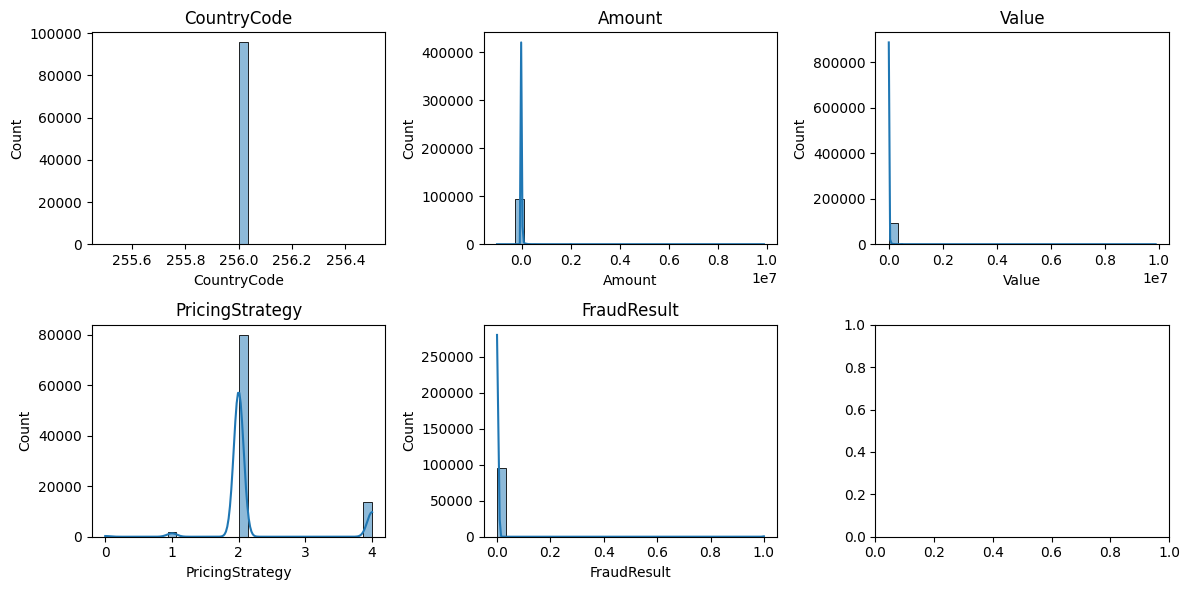

In [23]:
eu.plot_num_distributions(df)

## 4. Distributions - Categorical

2025-06-29 22:43:34,373 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 22:43:34,378 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


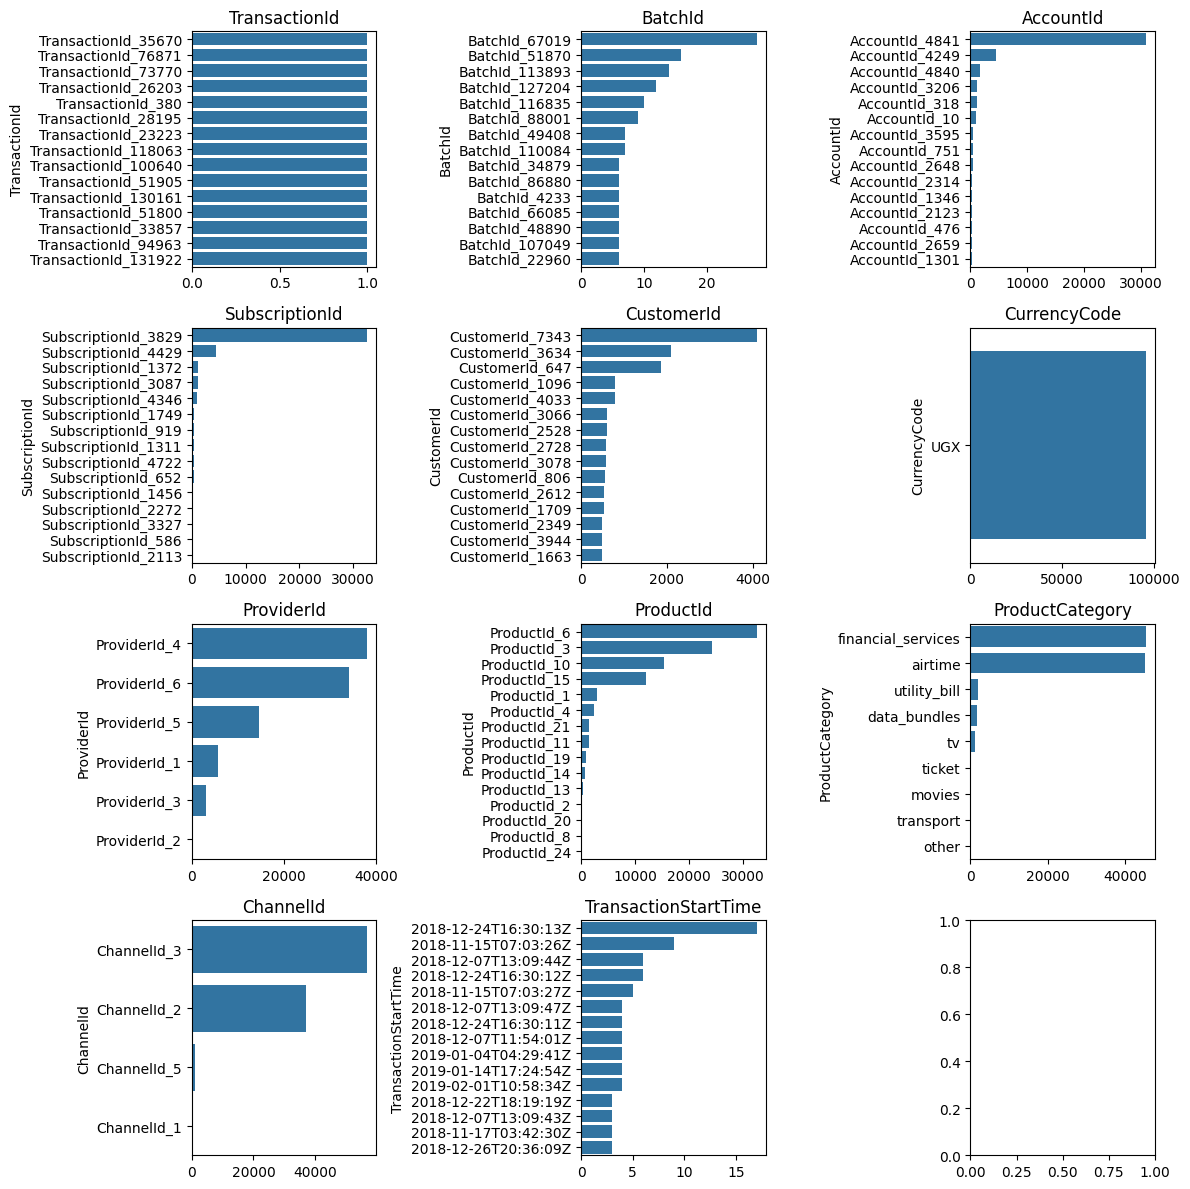

In [24]:
eu.plot_cat_distributions(df)

## 5. Correlation analysis

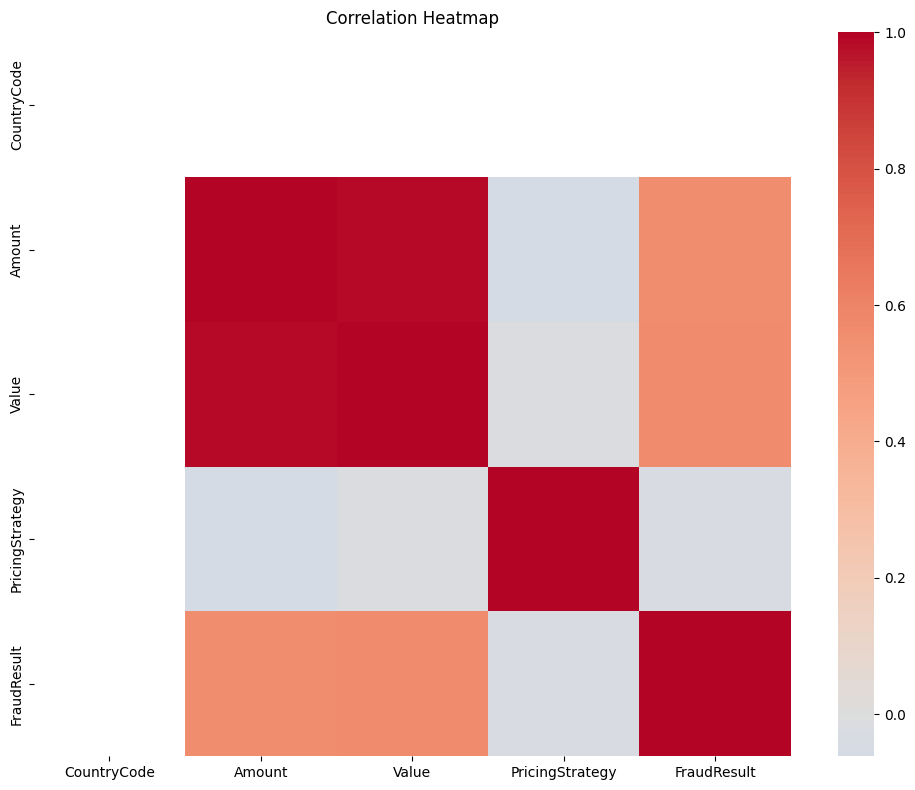

In [25]:
eu.plot_correlation_heatmap(df)

## 6. Missing values

In [26]:
missing = df.isna().mean().mul(100).sort_values(ascending=False)
missing[missing>0].head(20)

Series([], dtype: float64)

## 7. Outlier detection

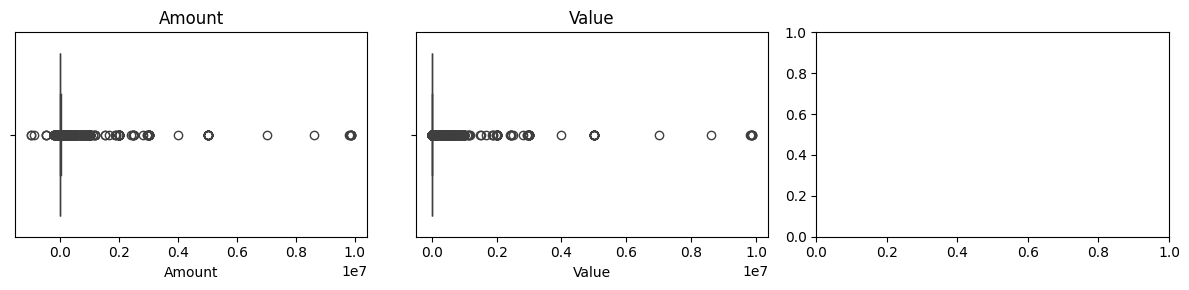

In [27]:
eu.boxplot_outliers(df, ['Amount','Value'])